In [15]:
import acados
import importlib

importlib.reload(acados)

<module 'acados' from '/home/amon/Repositories/zero-order-gp-mpc-package/examples/l4casadi_vs_l4acados/acados.py'>

In [16]:
from acados import run, MultiLayerPerceptron, DoubleIntegratorWithLearnedDynamics, MPC
import l4casadi as l4c
import numpy as np
import time
import zero_order_gpmpc as zogp
from typing import Optional, Union
import torch
import casadi as cs

In [17]:
from zero_order_gpmpc.controllers.residual_learning_mpc import ResidualLearningMPC
from zero_order_gpmpc.models import ResidualModel
from zero_order_gpmpc.models.gpytorch_models.gpytorch_residual_model import (
    FeatureSelector,
)
from zero_order_gpmpc.controllers.zoro_acados_utils import setup_sim_from_ocp

In [18]:
import copy

In [19]:
from run_single_experiment import *

In [20]:
N = 20
ts = 1.0 / N
batch_dim = 1
hidden_layers = 5
warmup_iter = 100
solve_steps = 1000
num_threads = 1
# device = "cpu"
device = "cuda"
num_threads_acados_openmp = 4

In [21]:
x_l4casadi, opt_times_l4casadi, x_l4acados, opt_times_l4acados = run(
    N,
    hidden_layers,
    solve_steps,
    device=device,
    num_threads_acados_openmp=num_threads_acados_openmp,
)

/home/amon/.pyenv/versions/3.9.13/envs/zero-order-gpmpc-package/lib/python3.9/site-packages/torch/jit/_check.py:177: UserWarning: The TorchScript type system doesn't support instance-level annotations on empty non-base types in `__init__`. Instead, either 1) use a type annotation in the class body, or 2) wrap the type in `torch.jit.Attribute`.
  warnings.warn(


CUDA is available! Using GPU cuda.
 If there is an incompatibility with the CasADi generated code, please consider changing your CasADi version.
Version 3.6.5 currently in use.
rm -f libacados_ocp_solver_wr.so
rm -f acados_solver_wr.o
cc -fPIC -std=c99   -O2 -fopenmp -I/home/amon/Repositories/zero-order-gp-mpc-package/external/acados/include -I/home/amon/Repositories/zero-order-gp-mpc-package/external/acados/include/acados -I/home/amon/Repositories/zero-order-gp-mpc-package/external/acados/include/blasfeo/include -I/home/amon/Repositories/zero-order-gp-mpc-package/external/acados/include/hpipm/include  -c -o acados_solver_wr.o acados_solver_wr.c
cc -fPIC -std=c99   -O2 -fopenmp -I/home/amon/Repositories/zero-order-gp-mpc-package/external/acados/include -I/home/amon/Repositories/zero-order-gp-mpc-package/external/acados/include/acados -I/home/amon/Repositories/zero-order-gp-mpc-package/external/acados/include/blasfeo/include -I/home/amon/Repositories/zero-order-gp-mpc-package/external/a

make: *** No rule to make target 'clean_all'.  Stop.


cc -fPIC -std=c99   -O2 -fopenmp -I/home/amon/Repositories/zero-order-gp-mpc-package/external/acados/include -I/home/amon/Repositories/zero-order-gp-mpc-package/external/acados/include/acados -I/home/amon/Repositories/zero-order-gp-mpc-package/external/acados/include/blasfeo/include -I/home/amon/Repositories/zero-order-gp-mpc-package/external/acados/include/hpipm/include  -c -o acados_solver_linear_model_with_params_nx2_nu1_np0.o acados_solver_linear_model_with_params_nx2_nu1_np0.c
cc -fPIC -std=c99   -O2 -fopenmp -I/home/amon/Repositories/zero-order-gp-mpc-package/external/acados/include -I/home/amon/Repositories/zero-order-gp-mpc-package/external/acados/include/acados -I/home/amon/Repositories/zero-order-gp-mpc-package/external/acados/include/blasfeo/include -I/home/amon/Repositories/zero-order-gp-mpc-package/external/acados/include/hpipm/include  -c -o linear_model_with_params_nx2_nu1_np0_model/linear_model_with_params_nx2_nu1_np0_dyn_disc_phi_fun.o linear_model_with_params_nx2_nu1_

In file included from /home/amon/.pyenv/versions/3.9.13/envs/zero-order-gpmpc-package/lib/python3.9/site-packages/numpy/core/include/numpy/ndarraytypes.h:1929,
                 from /home/amon/.pyenv/versions/3.9.13/envs/zero-order-gpmpc-package/lib/python3.9/site-packages/numpy/core/include/numpy/ndarrayobject.h:12,
                 from /home/amon/.pyenv/versions/3.9.13/envs/zero-order-gpmpc-package/lib/python3.9/site-packages/numpy/core/include/numpy/arrayobject.h:5,
                 from acados_ocp_solver_pyx.c:1230:
/home/amon/.pyenv/versions/3.9.13/envs/zero-order-gpmpc-package/lib/python3.9/site-packages/numpy/core/include/numpy/npy_1_7_deprecated_api.h:17:2: warning: #warning "Using deprecated NumPy API, disable it with " "#define NPY_NO_DEPRECATED_API NPY_1_7_API_VERSION" [-Wcpp]
   17 | #warning "Using deprecated NumPy API, disable it with " \
      |  ^~~~~~~


cc  -shared \
-o acados_ocp_solver_pyx.so \
-Wl,-rpath=/home/amon/Repositories/zero-order-gp-mpc-package/external/acados/lib \
acados_ocp_solver_pyx.o \
/home/amon/Repositories/zero-order-gp-mpc-package/examples/l4casadi_vs_l4acados/c_generated_code/libacados_ocp_solver_linear_model_with_params_nx2_nu1_np0.so \
-L/home/amon/Repositories/zero-order-gp-mpc-package/external/acados/lib -fopenmp -lacados -lhpipm -lblasfeo -lm
 If there is an incompatibility with the CasADi generated code, please consider changing your CasADi version.
Version 3.6.5 currently in use.
rm -f libacados_sim_solver_wr_new.so
rm -f acados_sim_solver_wr_new.o
rm -f acados_sim_solver_pyx.so
rm -f acados_sim_solver_pyx.o
cc -fPIC -std=c99   -O2 -fopenmp -I/home/amon/Repositories/zero-order-gp-mpc-package/external/acados/include -I/home/amon/Repositories/zero-order-gp-mpc-package/external/acados/include/acados -I/home/amon/Repositories/zero-order-gp-mpc-package/external/acados/include/blasfeo/include -I/home/amon/Repos

In file included from /home/amon/.pyenv/versions/3.9.13/envs/zero-order-gpmpc-package/lib/python3.9/site-packages/numpy/core/include/numpy/ndarraytypes.h:1929,
                 from /home/amon/.pyenv/versions/3.9.13/envs/zero-order-gpmpc-package/lib/python3.9/site-packages/numpy/core/include/numpy/ndarrayobject.h:12,
                 from /home/amon/.pyenv/versions/3.9.13/envs/zero-order-gpmpc-package/lib/python3.9/site-packages/numpy/core/include/numpy/arrayobject.h:5,
                 from acados_sim_solver_pyx.c:1230:
/home/amon/.pyenv/versions/3.9.13/envs/zero-order-gpmpc-package/lib/python3.9/site-packages/numpy/core/include/numpy/npy_1_7_deprecated_api.h:17:2: warning: #warning "Using deprecated NumPy API, disable it with " "#define NPY_NO_DEPRECATED_API NPY_1_7_API_VERSION" [-Wcpp]
   17 | #warning "Using deprecated NumPy API, disable it with " \
      |  ^~~~~~~


cc  -shared \
-o acados_sim_solver_pyx.so \
-Wl,-rpath=/home/amon/Repositories/zero-order-gp-mpc-package/external/acados/lib \
acados_sim_solver_pyx.o \
/home/amon/Repositories/zero-order-gp-mpc-package/examples/l4casadi_vs_l4acados/c_generated_code/libacados_sim_solver_wr_new.so \
-L/home/amon/Repositories/zero-order-gp-mpc-package/external/acados/lib -fopenmp -lacados -lhpipm -lblasfeo -lm


In [22]:
import matplotlib.pyplot as plt

In [23]:
opt_times_l4casadi_avg = np.cumsum(opt_times_l4casadi[warmup_iter:]) / np.arange(
    1, len(opt_times_l4casadi[warmup_iter:]) + 1
)
opt_times_l4acados_avg = np.cumsum(opt_times_l4acados[warmup_iter:]) / np.arange(
    1, len(opt_times_l4acados[warmup_iter:]) + 1
)

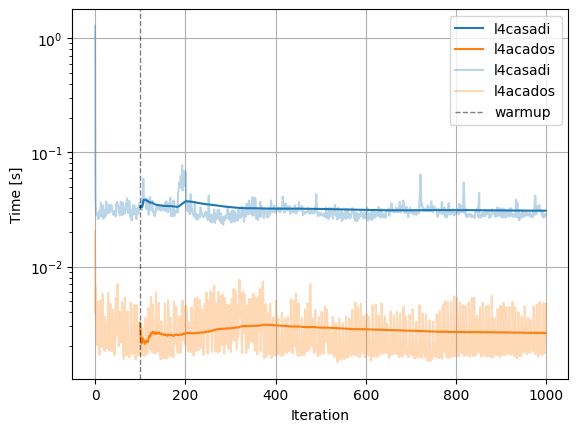

In [24]:
h_l4casadi = plt.plot(
    np.arange(warmup_iter, len(opt_times_l4casadi)),
    opt_times_l4casadi_avg,
    label="l4casadi",
)
h_l4acados = plt.plot(
    np.arange(warmup_iter, len(opt_times_l4casadi)),
    opt_times_l4acados_avg,
    label="l4acados",
)
plt.plot(
    opt_times_l4casadi,
    label="l4casadi",
    color=h_l4casadi[0].get_color(),
    alpha=0.3,
)
plt.plot(
    opt_times_l4acados,
    label="l4acados",
    color=h_l4acados[0].get_color(),
    alpha=0.3,
)
plt.axvline(
    x=warmup_iter, color="k", linestyle="--", linewidth=1, label="warmup", alpha=0.5
)
# axes scaling log
# plt.xscale("log")
plt.yscale("log")
# axes title y
plt.ylabel("Time [s]")
plt.xlabel("Iteration")
plt.legend()
# plt.ylim([1e-3, 1e-1])
plt.grid()

In [25]:
opt_times_l4casadi_avg[-1], opt_times_l4acados_avg[-1], opt_times_l4casadi_avg[
    -1
] / opt_times_l4acados_avg[-1]

(0.030880042176613644, 0.0026261802855636535, 11.758538568872815)

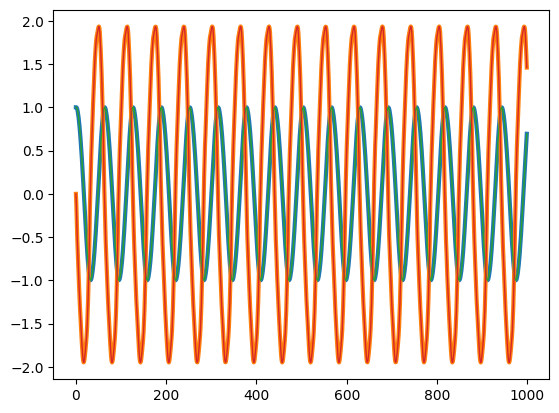

In [26]:
plt.plot(x_l4casadi, linewidth=3)
plt.plot(x_l4acados, linewidth=1)

In [27]:
np.linalg.norm(np.array(x_l4casadi) - np.array(x_l4acados))

1.0156918186686333e-11

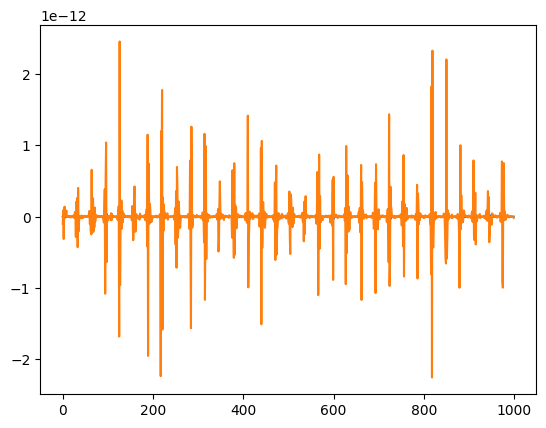

In [28]:
plt.plot(np.array(x_l4acados) - np.array(x_l4casadi))